# Netflix movies and TV shows

## Introduction:

>Do you ever think of Producing a movie or a show and releasing it on Netflix. Have yo ever thought of knowing more of Netflix releases. If it had more Movies or TV Shows? Have you ever thought of knowing if your country is one of the top countries in Netflix releases, or all knowing releases in your country? In this dataset , we will be checking some interesting facts about Netflix and having a full overview of all netflix releases and answering some interesting questions as well.

#### Table of Contents:

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul> 
      <li><a href="#nulls">Removing Null Values</a></li>
      <li><a href="#columns">Removing unnecessary column names</a></li> 
      <li><a href="#changedata">Changing datatypes </a></li> 
       <li><a href="#add">Adding new columns </a></li> 
        <li><a href="#dataframe">Creating two new dataframes </a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
     <li><a href="#Q1">Q1: Does Netflix focus more on movies or TV shows in the past 5 years ?
    <li><a href="#Q2"> Q2: What are the top 10 genres in movies and TV Shows?
     <li><a href="#Q3"> Q3: What are the countries with the highest releases in Movies and TV Shows? 
    <li><a href="#Q4">Q4: What are the user ratings in Movies and TV-Shows?
    <li><a href="#Q5">Q5:Which month has the highest releases and which has the lowest? When do you think might be the best month for a netlfix release?
    <li><a href="#Q6">Q6:What is the average movies duration? And the most seasons in TV shows?
    
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#RecommendationProgram">Recommendation Program</a></li>        
</ul>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading csv file and uploading it to our dataframe 

df=pd.read_csv('netflix_titles.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


*We have a total of 12 columns and 8807 rows.*

*we have null values in our dataframe*

*date_Added is a string we can change this to datetime*

*duration is string even though it should be an integer*

In [4]:
df.head() #checking an overview of our data 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


*Note: Release year is the year that the movie/ show was actually released on screen/ But date added means the date the move/show was added to Netflix platform.*

*duration in TV shows is measured in seasons while moviesis measured in minutes. So we can change movies duration to inttegers rather than strings. To do so we will need to diide our dataset into two datasets, one for movies and the other for TV-Shows*

In [5]:
df.isnull().sum() #checking null values 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

*Seems here we have a lot of nulls values in director,cast,country columns. Date added, rating and duration also have null values but aren't quite effective so we can omit them . Also the director and cast columns aren't neccessary as we will not be getting any insights from both columns*

In [6]:
df.duplicated().sum() #checking duplicates 

0

*We have no duplicated values*

In [7]:
df.nunique() #checking unique values

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

*type here has 2 unique values which are movies and TV shows.*

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


*Checking release year data hasn't got any unreliable data. Minimum is not negative and also the maximum is 2021 (not 2050 for example) so dates do make sense*

<a id='wrangling'></a>
## Data Wrangling:

In this section here we will working on our data to make it ready for analysis

<a id='nulls'></a>
## Working on null values:

We will remove null values in duration,rating and date_added,country


In [9]:
df.dropna(axis=0,subset=['duration','rating','date_added','country'],inplace=True)

<a id='columns'></a>
## Removing unneccessary columns:

*Removing director,cast,show_id*

In [10]:
df.drop(columns=['show_id'],inplace=True)

<a id='changedata'></a>
## Changing Data Types:
*Change the date-added column*

In [11]:
df['date_added']=pd.to_datetime(df['date_added'])

<a id='add'></a>
## Adding  a new column:
*Let's add two new columns called 'added_month','added_year' , the month  and year when the movie/series was launched on netflix*

In [12]:
df['added_month']=df['date_added'].dt.month_name()
df['added_year']=df['date_added'].dt.year

*Let's understand more of our new column and check the years to make sure our data does not need cleaning*

In [13]:
df['added_month'].describe()

count         7961
unique          12
top       December
freq           758
Name: added_month, dtype: object

In [14]:
df['added_year'].describe()

count    7961.000000
mean     2018.796634
std         1.562747
min      2008.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: added_year, dtype: float64

*Let's double check that our cleaning process is done correctly*

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7961 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          7961 non-null   object        
 1   title         7961 non-null   object        
 2   director      5747 non-null   object        
 3   cast          7290 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    7961 non-null   datetime64[ns]
 6   release_year  7961 non-null   int64         
 7   rating        7961 non-null   object        
 8   duration      7961 non-null   object        
 9   listed_in     7961 non-null   object        
 10  description   7961 non-null   object        
 11  added_month   7961 non-null   object        
 12  added_year    7961 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 870.7+ KB


We have 7961 rows and 12 columns

Now let's divide our dataset into two dataframes on for movies and the other for TV-shows to make it easier in analysis

<a id='dataframe'></a>
 ## Dividing dataframes into two diferrent dataframes:
 
 In this step here we will divide our main dataframe into two. Also we will make sure our data -duration- is integer rather than a string, specially in Movies dataframe

In [16]:
movies=df[df['type']=='Movie'] #Filtering dataframe with movies
tv_shows=df[df['type']=='TV Show'] #Filtering dataframe with tv shows

Let's note here that duration is of  type string. So it's better if we changed it to integer specially in the Movies dataframe as all tv shows are measured by how many seasons.
Our movies duration is in minutes so we will need to remove the mins and leave only the numbers an d change datatype to int

In [17]:
old_list=movies['duration'].to_list()
new_list=[]
for dur in old_list:
    index=dur.find(' ')
    dur=dur[:index]
    new_list.append(dur)

replacement_map = {i1: int(i2) for i1, i2 in zip(old_list, new_list)}
movies['duration']=movies['duration'].map(replacement_map)

C:\Users\saleh\AppData\Local\Temp/ipykernel_21024/2523613348.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].map(replacement_map)


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5687 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          5687 non-null   object        
 1   title         5687 non-null   object        
 2   director      5558 non-null   object        
 3   cast          5277 non-null   object        
 4   country       5687 non-null   object        
 5   date_added    5687 non-null   datetime64[ns]
 6   release_year  5687 non-null   int64         
 7   rating        5687 non-null   object        
 8   duration      5687 non-null   int64         
 9   listed_in     5687 non-null   object        
 10  description   5687 non-null   object        
 11  added_month   5687 non-null   object        
 12  added_year    5687 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 622.0+ KB


<a id='eda'></a>
# Exploratory Data Analysis:

**So now we can answer some interesting questions using visuals:**

<a id='Q1'></a>
## Q1: Does Netflix focus more on movies or TV shows in the past 5 years ?

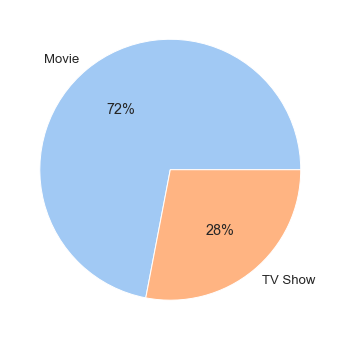

In [19]:
sns.set_theme(font_scale=1.2)
palette_colors = sns.color_palette('pastel')

plt.figure(figsize=(6,6));
recent_years=df[df['added_year']>2017]
labels= list(recent_years['type'].value_counts().index)
values=list(recent_years['type'].value_counts().values)
plt.pie(values,labels=labels,colors=palette_colors,autopct='%.0f%%');



**Findings:** Seems like Netflix platform has more movies than tv-shows

<a id='Q2'></a>
## Q2:What are the top 10 genres in movies and TV Shows?

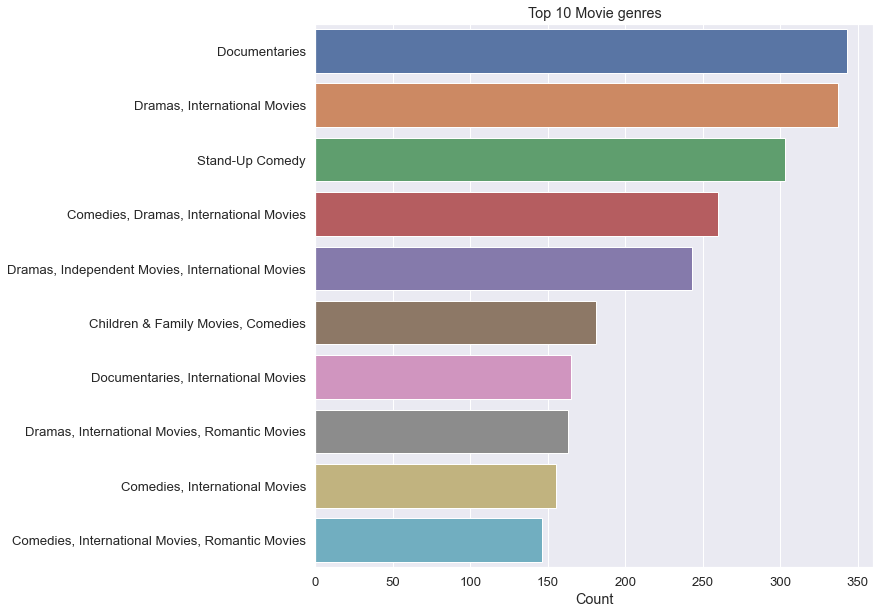

In [20]:
plt.figure(figsize=(10,10))

movie_genre=movies['listed_in'].value_counts()[:10] #Top 10 genres ( with highest count)

ax=sns.barplot(x=list(movie_genre.values),y=list(movie_genre.index));
ax.set(title='Top 10 Movie genres',xlabel='Count');

**Findings:** Documentaries are in the first place, Dramas and International movies are in the second place, Stand up Comedies come in the third place. 

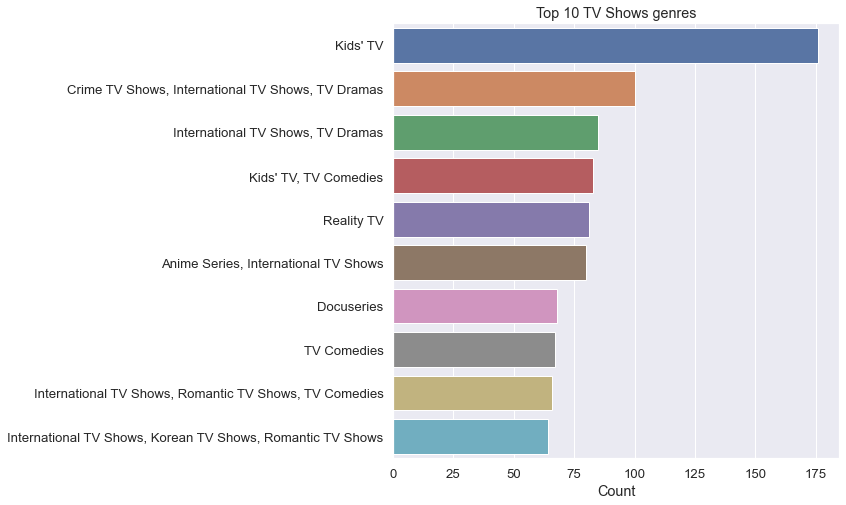

In [21]:
plt.figure(figsize=(8,8))

tv_genre=tv_shows['listed_in'].value_counts()[:10] #Top 10 genres ( with highest count)

ax=sns.barplot(x=list(tv_genre.values),y=list(tv_genre.index));
ax.set(title='Top 10 TV Shows genres',xlabel='Count');

**Findings:** Kids'TV shows are the highest shows on the netflix platform

<a id='Q3'></a>
## Q3: What are the countries with the highest releases in Movies and TV Shows?

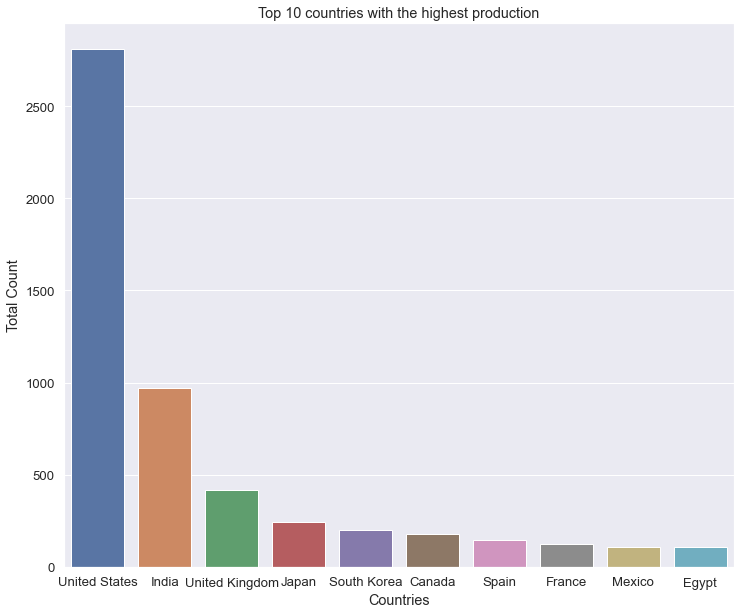

In [22]:
top_countries=df['country'].value_counts()[:10]

sns.set_color_codes('muted')
plt.figure(figsize=(12,10))
ax=sns.barplot(x=list(top_countries.index),y=list(top_countries.values));
ax.set(title="Top 10 countries with the highest production",xlabel="Countries",ylabel='Total Count');

**Findings:** We can find that United States has the highest number of movies and shows , India comes in the second place and the UK comes in the 3rd place.

<a id='Q4'></a>
## Q4: What are the user ratings in Movies and TV-Shows?

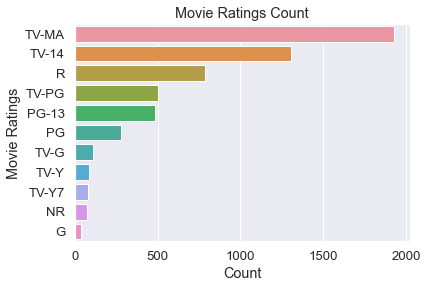

In [23]:
ratings=movies['rating'].value_counts()

ax=sns.barplot(x=list(ratings.values[:11]),y=list(ratings.index[:11]));
ax.set(title='Movie Ratings Count',xlabel='Count',ylabel='Movie Ratings');

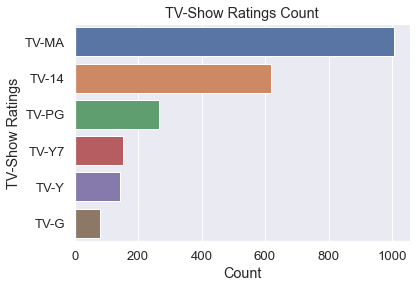

In [24]:
ratings=tv_shows['rating'].value_counts()

ax=sns.barplot(x=list(ratings.values[:6]),y=list(ratings.index[:6]));
ax.set(title='TV-Show Ratings Count',xlabel='Count',ylabel='TV-Show Ratings');

**Findings:** TV-MA is widely spread in movies and tv-shows.

<a id='Q5'></a>

## Q5:Which month and year have the highest releases and which has the lowest? When do you think might be the best month/year for a netlfix release?

**Let's start with the movie releases:**

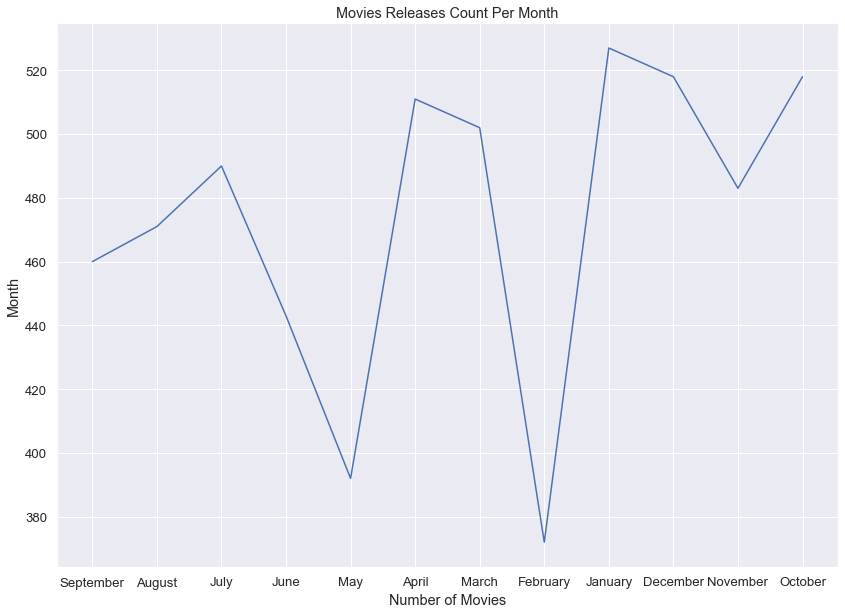

In [25]:
plt.figure(figsize=(14,10))
x1=list(movies['added_month'].value_counts(sort=False).index)
y1=list(movies['added_month'].value_counts(sort=False).values)
ax1=sns.lineplot(x=x1,y=y1)
ax1.set(title='Movies Releases Count Per Month',xlabel='Number of Movies',ylabel='Month');


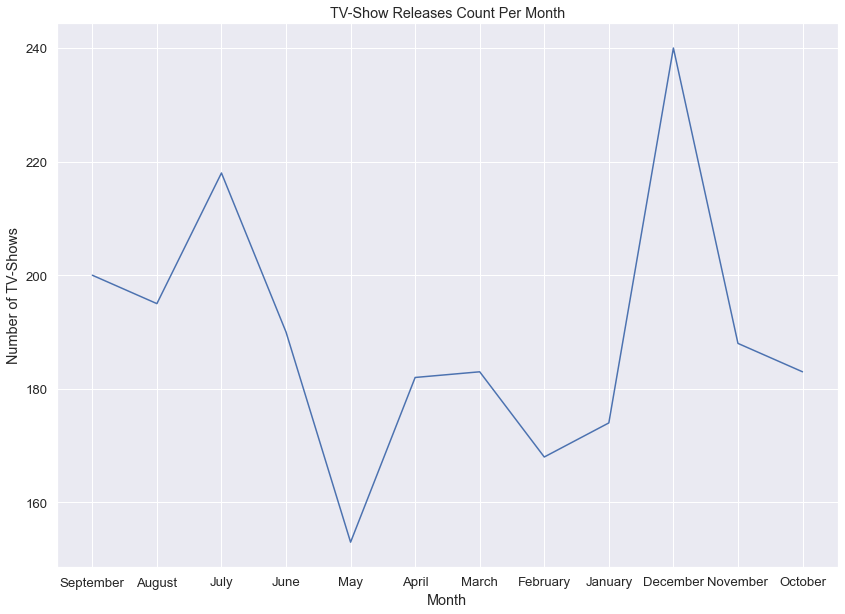

In [26]:
plt.figure(figsize=(14,10))
x2=list(tv_shows['added_month'].value_counts(sort=False).index)
y2=list(tv_shows['added_month'].value_counts(sort=False).values)
ax2=sns.lineplot(x=x2,y=y2)
ax2.set(title='TV-Show Releases Count Per Month',xlabel='Month',ylabel='Number of TV-Shows');


**Findings:** January has the highest rate of movie releases, while December has the highest rate of TV-show releases.
February has the lowest rate of movie releases and May has the lowest rate of TV-show releases.

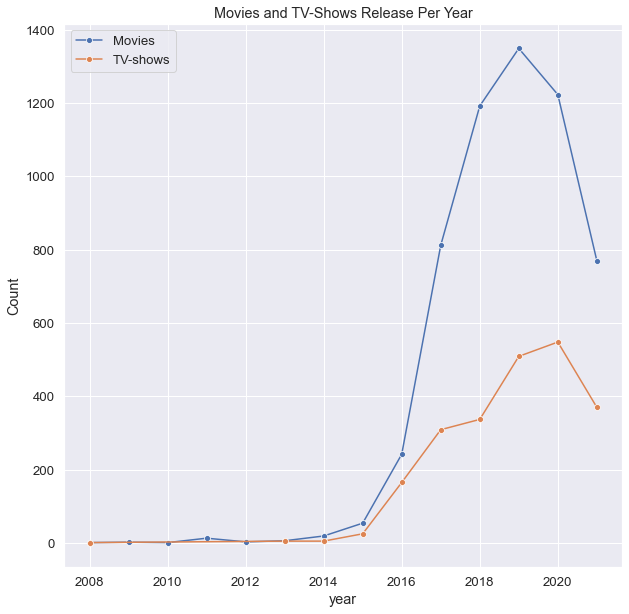

In [27]:
plt.figure(figsize=(10,10))
x1=list(movies['added_year'].value_counts(sort=True).index)
y1=list(movies['added_year'].value_counts(sort=True).values)
ax1=sns.lineplot(x=x1,y=y1,marker='o')
x2=list(tv_shows['added_year'].value_counts(sort=True).index)
y2=list(tv_shows['added_year'].value_counts(sort=True).values)
ax2=sns.lineplot(x=x2,y=y2,marker='o')
legends=['Movies','TV-shows']
plt.legend(legends);
ax1.set(title='Movies and TV-Shows Release Per Year',xlabel='year',ylabel='Count');

**Findings:** The highest movie releases happened in 2019 ,while tv shows was in 2020

<a id='Q6'></a>
## Q6: What is the average movies duration? And the most seasons in TV shows?

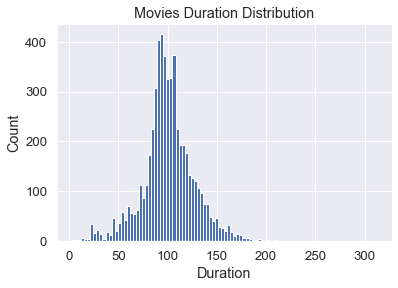

In [28]:
ax=movies['duration'].hist(bins=100);
ax.set(title='Movies Duration Distribution',xlabel='Duration',ylabel='Count');

In [29]:
movies['duration'].mean()

100.51802356251099

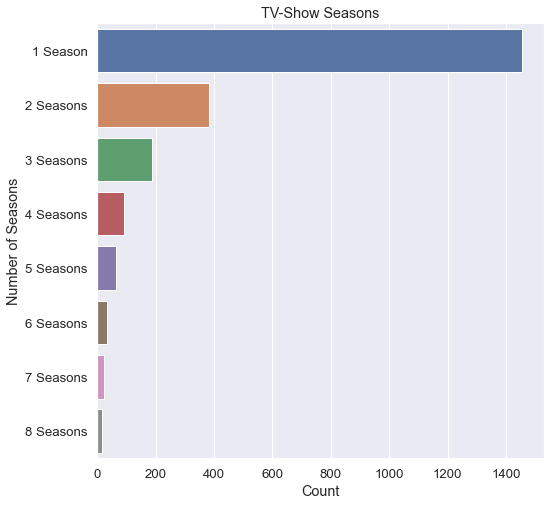

In [30]:
plt.figure(figsize=(8,8))
index=tv_shows.duration.value_counts().index[:8]
values=tv_shows.duration.value_counts().values[:8]
ax=sns.barplot(x=values,y=index);
ax.set(title='TV-Show Seasons',xlabel='Count',ylabel='Number of Seasons');

<a id='conclusions"'></a>
# Conclusion:

After exploring our data we can conclude the following:

- Netflix invests more in movies. Meaning that there are movies than TV-Shows on Netflix.
- The top netflix movies genres are Documentaries and Stand up comedies. While the top tv-show genres is Kid TV-shows.
- TV-MA Ratings is the maximum rating in both in Movies and TV-Shows, which means content for mature audience only. t is weird as the majority of tv-shows genre is Kids TVshows which its audience would be children. 
- January and December seem to be a good time for a netflix release. Which is mostly around Christmas Time and new year's eve.
- Netflix in the recent 3 years has a shown a large amoount of releases in both TV-Shows and Movies
- The average duration of NEtflix movies is 100 minutes, while most tv-shows on Netflix are only 1 season.

 >So if you're a producer and looking to release your work of art on Netflix. We would recommend doing a Movie, A documentary and the best time to release it would be in January or Decemeber. If you want to more about netflix releases in your country the next part here shows a small program where you are asked to enter your country and wether you want to know more information about movies ot tv show releases in your country.
The information you'll find is about directors, cast, description and release year.  


<a id="RecommendationProgram"></a>
## Recommendation Program: 


In [32]:
def recommend(country,Type):
    country=country.title()
    filtered=df[(df['country']==country) & (df['type']==Type)]
    filtered['director'].fillna(value=" ",inplace=True) #filling null values in director
    filtered['cast'].fillna(value=" ",inplace=True)    #filling null values in cast
    filtered.drop(axis=1,columns=['type','country','added_month','date_added','added_year','rating','duration'],inplace=True)
    return filtered

country=input('Which country would you like to know more data about?')
Type=input('Would you like to show Movie or TV Show?')
recommend(country,Type)

Which country would you like to know more data about?egypt
Would you like to show Movie or TV Show?Movie


C:\Users\saleh\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\saleh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,title,director,cast,release_year,listed_in,description
529,Return of the Prodigal Son,Youssef Chahine,"Majida El Roumi, Souheir El Morshidy, Shoukry ...",1976,"Dramas, International Movies","Freed after spending 12 years in jail, a man's..."
859,Asmaa,Amr Salama,"Hend Sabry, Maged El-Kidwani, Hany Adel, Sayed...",2011,"Dramas, International Movies","Constantly denied medical treatment, an HIV po..."
991,One Like It,Marwan Nabil,"Riham Abdel Ghafour, Mohammed Aly Rizk, Hazem ...",2020,"Dramas, Independent Movies, International Movies",This short film follows a day in the life of a...
1511,Mohamed Hussein,Muhammad Ali,"Mohamed Saad, Samir Sabri, Mai Selim, Dina Moh...",2019,"Comedies, International Movies",A luxury hotel chauffeur's life is turned upsi...
1662,The Suit,Mohammad Adel,"Tamer Hosny, Akram Hosny, Amina Khalil, Dalal ...",2018,"Action & Adventure, Comedies, International Mo...",After a duo of slackers dress up as policemen ...
...,...,...,...,...,...,...
8528,The Thief and the Imbecile,"Mohammed El-Tahawy, Mohamed Mostafa","Khaled El Sawy, Khaled Saleh, Ruby",2013,"Dramas, International Movies",A street beggar befriends a man who lost his e...
8550,The Walls of the Moon,"Ossama Abu El Atta, Tarek Al Eryan","Mona Zaki, Asser Yassin, Amr Saad, Salwa Mohammed",2015,"Action & Adventure, Dramas, International Movies","After losing her eyesight in an accident, a wo..."
8663,Unruly Friends,Sherif Mandour,"Kinda Allouch, Ahmed Salah Al-Saadany, Dina Fo...",2011,"International Movies, Thrillers",A young woman discovers that familial and psyc...
8666,Used Goods,Mohamed Hamdy,"Mohamed Ragab, Ayten Amer, Hassan Abdulfattah",2018,"Action & Adventure, Comedies, International Mo...","To evade greedy pharmaceutical crooks, a medic..."
